<a href="https://colab.research.google.com/github/Ntelhon/Weather_Temp_Prediction_ANN/blob/master/ANN_MT1v2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras
from keras import layers

In [66]:
# Load the dataset
data = pd.read_csv('train_daily.csv')

In [50]:
def data_preprocessing(data):
  preprocessed_data = data.copy()
  preprocessed_data["temp-1"] = data["temp"].shift(periods=1)
  preprocessed_data["temp-2"] = data["temp"].shift(periods=2)
  preprocessed_data["temp-3"] = data["temp"].shift(periods=3)
  preprocessed_data["pressure-1"] = data["pressure"].shift(periods=1)
  preprocessed_data["pressure-2"] = data["pressure"].shift(periods=2)
  preprocessed_data["pressure-3"] = data["pressure"].shift(periods=3)
  preprocessed_data["humidity-1"] = data["humidity"].shift(periods=1)
  preprocessed_data["humidity-2"] = data["humidity"].shift(periods=2)
  preprocessed_data["humidity-3"] = data["humidity"].shift(periods=3)
  preprocessed_data = preprocessed_data.dropna()
  preprocessed_data = preprocessed_data.drop(["feels_like", "temp_min", "temp_max", "wind_deg"], axis=1)
  return preprocessed_data

In [67]:
data = data_preprocessing(data)
# print(data.head())

X = data[['temp-1', 'temp-2', 'temp-3']]# Input features
Y = data['temp']  # Target variable
print(X.head())
print(Y.head())

   temp-1  temp-2  temp-3
3  285.19  284.97  285.88
4  285.49  285.19  284.97
5  285.07  285.49  285.19
6  285.92  285.07  285.49
7  286.27  285.92  285.07
3    285.49
4    285.07
5    285.92
6    286.27
7    284.65
Name: temp, dtype: float64


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train_scaled and X_test_scaled to be 3-dimensional
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [53]:
# # Build the neural network model
# model = keras.Sequential()
# model.add(layers.Dense(12, input_dim=9, activation='relu'))
# model.add(layers.Dense(4, activation='relu'))
# model.add(layers.Dense(2, activation='relu'))
# model.add(layers.Dense(1, activation='linear')) # Output layer

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# model.fit(X_train_scaled, Y_train, epochs=500, batch_size=16, validation_split=0.1, verbose=2)

In [73]:
# create and fit the LSTM network
model = np.NaN
model = keras.Sequential()
model.add(layers.LSTM(10, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
# model.add(layers.LSTM(5, activation='relu'))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled, Y_train, epochs=1000, batch_size=16, verbose=2)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 - 2s - 146ms/step - loss: 84848.7812
Epoch 2/1000
17/17 - 0s - 5ms/step - loss: 84819.5703
Epoch 3/1000
17/17 - 0s - 8ms/step - loss: 84788.5469
Epoch 4/1000
17/17 - 0s - 7ms/step - loss: 84752.5469
Epoch 5/1000
17/17 - 0s - 3ms/step - loss: 84711.8203
Epoch 6/1000
17/17 - 0s - 3ms/step - loss: 84664.8516
Epoch 7/1000
17/17 - 0s - 4ms/step - loss: 84609.2734
Epoch 8/1000
17/17 - 0s - 4ms/step - loss: 84544.7188
Epoch 9/1000
17/17 - 0s - 7ms/step - loss: 84470.4688
Epoch 10/1000
17/17 - 0s - 4ms/step - loss: 84385.9609
Epoch 11/1000
17/17 - 0s - 4ms/step - loss: 84291.2656
Epoch 12/1000
17/17 - 0s - 4ms/step - loss: 84180.8516
Epoch 13/1000
17/17 - 0s - 3ms/step - loss: 84063.0625
Epoch 14/1000
17/17 - 0s - 3ms/step - loss: 83929.8594
Epoch 15/1000
17/17 - 0s - 3ms/step - loss: 83785.4766
Epoch 16/1000
17/17 - 0s - 8ms/step - loss: 83626.9453
Epoch 17/1000
17/17 - 0s - 3ms/step - loss: 83457.7344
Epoch 18/1000
17/17 - 0s - 4ms/step - loss: 83279.3984
Epoch 19/1000
17/17 - 0s - 3ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Mean Squared Error on Test Set: 5.310944363617115


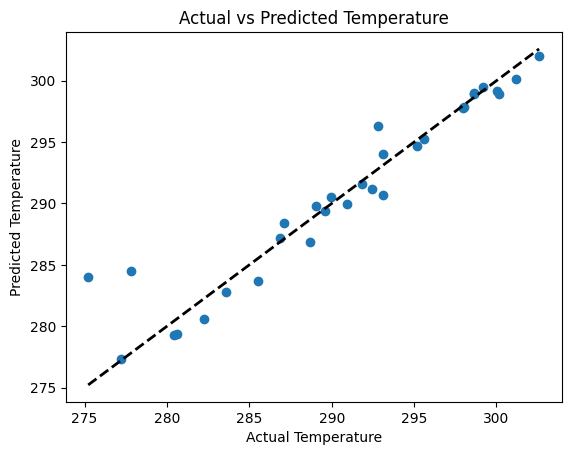

In [74]:
# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)
Y_pred = Y_pred.reshape(-1) # Reshape to a 1D array

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# plot the results
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [78]:
# Save the model
# model.save('3DaytoNextv2.0.h5')
model.save('3DaytoNextv2.3.keras')

In [76]:
novData = pd.read_csv('test_daily.csv')
novData = data_preprocessing(novData)
X = novData[['temp-1', 'temp-2', 'temp-3']]# Input features
Y = novData['temp-1']  # Target variable
X_scaled = scaler.transform(X)
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
Y_pred = model.predict(X_scaled)
Y_pred = Y_pred.reshape(-1) # Reshape to a 1D array

# Evaluate the model
mse = mean_squared_error(Y[0::], Y_pred[::])
print(f'Mean Squared Error on Test Set: {mse}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error on Test Set: 0.18682005821317707


          Date  Real Val  Predicted Val  Percentage Error
3   2024-11-01     15.08      15.392059              2.07
4   2024-11-02     15.11      15.514709              2.68
5   2024-11-03     14.15      14.363434              1.51
6   2024-11-04     13.55      13.801727              1.86
7   2024-11-05     11.25      11.189850              0.53
8   2024-11-06     11.90      11.926331              0.22
9   2024-11-07     12.16      11.934692              1.85
10  2024-11-08     13.34      13.302002              0.28
11  2024-11-09     13.78      13.766998              0.09
12  2024-11-10     12.53      12.499329              0.24
13  2024-11-11     11.07      11.002502              0.61
14  2024-11-12     13.35      13.404968              0.41
15  2024-11-13     14.45      14.373474              0.53
16  2024-11-14     13.14      13.120087              0.15
17  2024-11-15     13.87      14.148010              2.00
18  2024-11-16     12.19      12.094635              0.78
19  2024-11-17

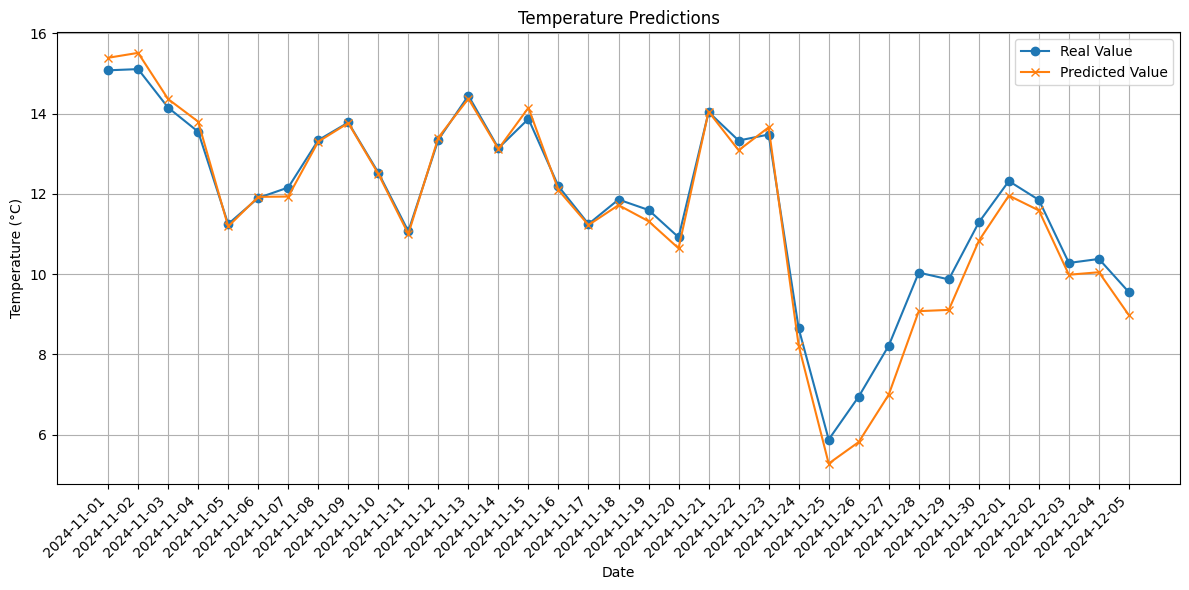

In [77]:
# Calculate daily percentage errors
novData['Predicted_Temp'] = Y_pred
novData['Actual_Temp'] = Y
novData['Error'] = abs(novData['Actual_Temp'] - novData['Predicted_Temp'])
novData['Percentage_Error'] = (novData['Error'] / (novData['Actual_Temp']-273)) * 100

# Create a calendar-like DataFrame
calendar_df = pd.DataFrame({
    'Date': novData['date'],
    'Real Val': novData['Actual_Temp'] - 273,
    'Predicted Val': novData['Predicted_Temp'] - 273,
    'Percentage Error': novData['Percentage_Error'].round(2)
})

# Display the calendar
print(calendar_df)

# Plot the results with error bars
plt.figure(figsize=(12, 6))
plt.plot(calendar_df['Date'], calendar_df['Real Val'], label='Real Value', marker='o')
plt.plot(calendar_df['Date'], calendar_df['Predicted Val'], label='Predicted Value', marker='x')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Predictions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()